---
# **Importing Packages**
---

In [53]:
import pandas as pd
import matplotlib.pyplot as plt      # creating visualizations their management
from wordcloud import WordCloud      #for word clouds
import seaborn as sns                #for visualizations
import neattext as nt                #package for text cleaning
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer  #package for text vectorization
from sklearn.model_selection import train_test_split       #function for data splitting

### **Reading the Data**

In [19]:
df=pd.read_excel('OUTPUT_ocr_test (2).xlsx',engine="openpyxl")

### **Selecting the Required Data Features**

In [20]:
df=df[['text_cleaned','MOTIFRECLA']]

### **Checking Null Values**

In [25]:
df.isnull().sum()

text_cleaned    7
MOTIFRECLA      0
dtype: int64

---
very less no of null values, lets drop them


### **Dropping Null Values**

In [26]:
df.dropna(axis=0,inplace=True)

In [37]:
def text_cleaning(text):
    text=nt.remove_numbers(text)
    text=nt.remove_special_characters(text)
    text=nt.remove_non_ascii(text)
    text=nt.remove_multiple_spaces(text)
    text=nt.remove_numbers(text)
    text=nt.remove_dates(text)
    text=nt.remove_emojis(text)
    text=nt.remove_emails(text)
    text=nt.remove_urls(text)
    text=nt.remove_currencies(text)
    text=nt.remove_shortwords(text,3)
    return text

In [38]:
df['cleaned_text']=df['text_cleaned'].apply(lambda x:text_cleaning(x))

In [40]:
from collections import Counter

In [41]:
text=''.join(df['cleaned_text'])  #creating copra of cleanned text

In [42]:
cnt=Counter()  #creating obeject of counter
cnt.update(text.split())   #counting occurrence of each ingredient

In [43]:
cnt=cnt.most_common(20)   #selecting most common item occurence

In [44]:
x=[i[0] for i in cnt]
y=[i[1] for i in cnt]

### **20 Most Common Words**

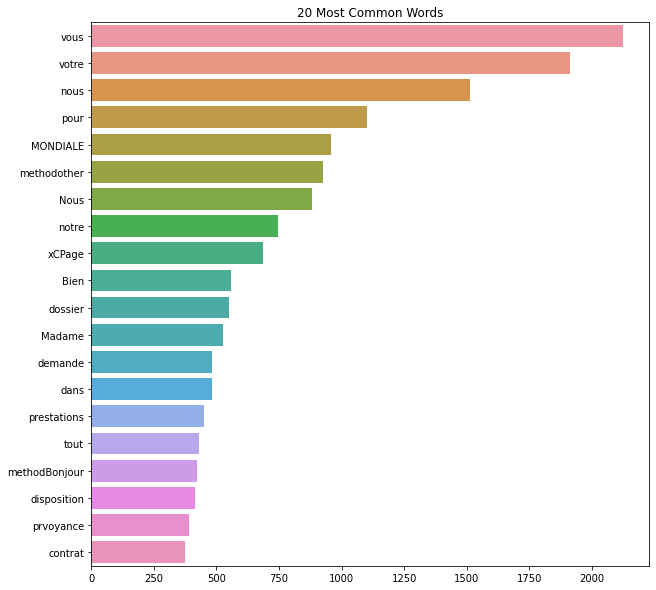

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x,orient="h" )
plt.title("20 Most Common Words");

### **Word Cloud**

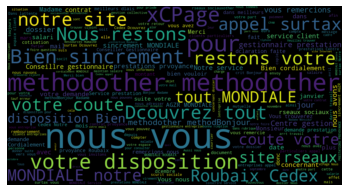

In [46]:
wordcloud = WordCloud(width=1500, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Removing Stopwords**

In [47]:
import nltk                                  #package for text analysis
nltk.download('stopwords')                   #importing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))  #importing french stopwords

[nltk_data] Downloading package stopwords to C:\Users\Zee
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Separating X and y**

In [49]:
#text vectorization using tf-idf vectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=10000)
X = vectorizer.fit_transform(df['text_cleaned'])

In [50]:
y=new_df['MOTIFRECLA']

### **Data Splitting**

In [51]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
# **Model Development**
---

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

+ ==================================================================================================== +
			1-For Support Vector Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.6468330134357005
--------------------------------------------------
F1 :  [0.         0.         0.         0.         0.78596491 0.
 0.         0.10526316 0.         0.        ]
--------------------------------------------------
Reacll :  [0.         0.         0.         0.         1.         0.
 0.         0.05555556 0.         0.        ]
--------------------------------------------------
Precision :  [0.         0.         0.         0.         0.64739884 0.
 0.         1.         0.         0.        ]
--------------------------------------------------
cross validation accuracy :  0.6341259412372656
--------------------------------------------------
Confusion Matrix....
 [[  0   0   0   0  23   0  

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


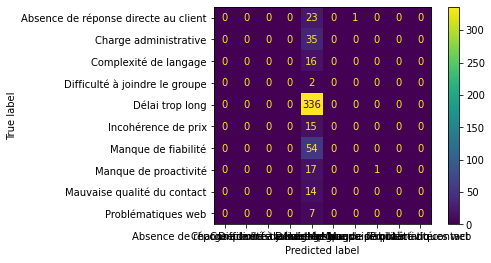

							-----------------------------------------------------------
							 Time for detection (Support Vector Classifier) : 8.925 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

+ ==================================================================================================== +
			2-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.6449136276391555
--------------------------------------------------
F1 :  [0.         0.         0.         0.         0.78454333 0.
 0.         0.10526316 0.         0.        ]
--------------------------------------------------
Reacll :  [0.         0.         0.         0.         0.99702381 0.
 0.         0.05555556 0.         0.        ]
--------------------------------------------------
Precision :  [0.         0.         0.         0.         0.64671815 0.
 0.         1.         0.         0.        ]
--------------------------------------------------
cross validation accuracy :  0.634126679462572
--------------------------------------------------
Confusion Matrix....
 [[  0   0   0   0  23   0   1   0  

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


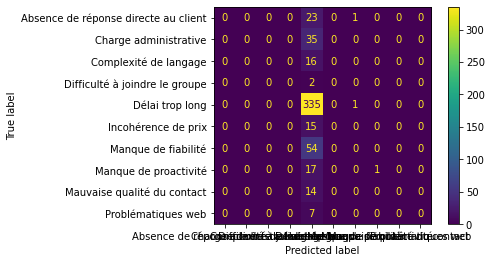

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 7.847 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

+ ==================================================================================================== +
			3-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.6449136276391555
--------------------------------------------------
F1 :  [0.         0.         0.         0.         0.78546307 0.
 0.         0.10526316 0.         0.        ]
--------------------------------------------------
Reacll :  [0.         0.         0.         0.         0.99702381 0.
 0.         0.05555556 0.         0.        ]
--------------------------------------------------
Precision :  [0.         0.         0.         0.         0.64796905 0.
 0.         1.         0.         0.        ]
--------------------------------------------------
cross validation accuracy :  0.6302842167429499
--------------------------------------------------
Confusion Matrix....
 [[  0   0   1   0  22   0   1   

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


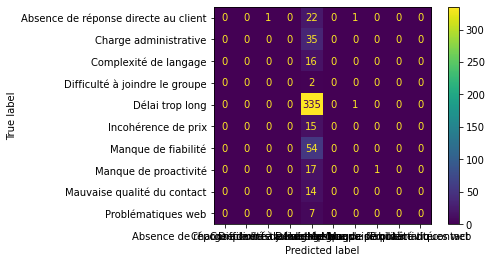

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 1.227 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

+ ==================================================================================================== +
			4-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.6372360844529751
--------------------------------------------------
F1 :  [0.         0.         0.         0.         0.77830189 0.
 0.         0.2        0.         0.        ]
--------------------------------------------------
Reacll :  [0.         0.         0.         0.         0.98214286 0.
 0.         0.11111111 0.         0.        ]
--------------------------------------------------
Precision :  [0.         0.         0.         0.         0.64453125 0.
 0.         1.         0.         0.        ]
--------------------------------------------------
cross validation accuracy :  0.6318219400561051
--------------------------------------------------
Confusion Matrix....
 [[  0   0   0   0  23   0   1 

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


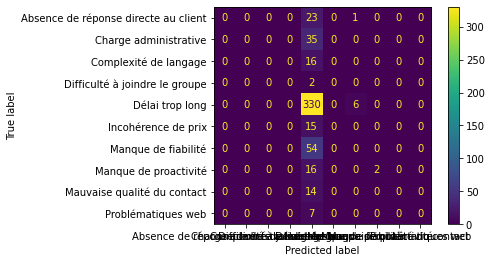

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 21.78 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For NaiveBayesClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.6468330134357005
--------------------------------------------------
F1 :  [0.         0.         0.         0.         0.78504673 0.
 0.         0.10526316 0.         0.        ]
--------------------------------------------------
Reacll :  [0.         0.         0.         0.         1.         0.
 0.         0.05555556 0.         0.        ]
--------------------------------------------------
Precision :  [0.         0.         0.         0.         0.64615385 0.
 0.         1.         0.         0.        

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

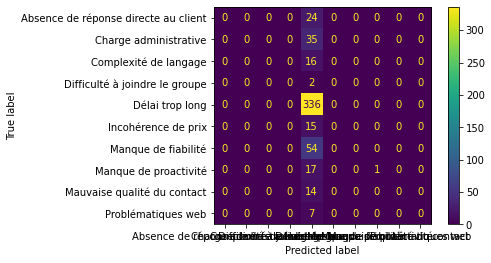

							-----------------------------------------------------------
							 Time for detection (NaiveBayesClassifier) : 0.768 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

+ ==================================================================================================== +
			6-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.5681381957773513
--------------------------------------------------
F1 :  [0.         0.03921569 0.14814815 0.         0.74168798 0.
 0.         0.20689655 0.         0.        ]
--------------------------------------------------
Reacll :  [0.         0.02857143 0.125      0.         0.86309524 0.
 0.         0.16666667 0.         0.        ]
--------------------------------------------------
Precision :  [0.         0.0625     0.18181818 0.         0.65022422 0.
 0.         0.27272727 0.         0.        ]
--------------------------------------------------
cross validation accuracy :  0.5772464196072641
--------------------------------------------------
Confusion Matrix....
 [[  0   0   0   0  22   0   2 

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


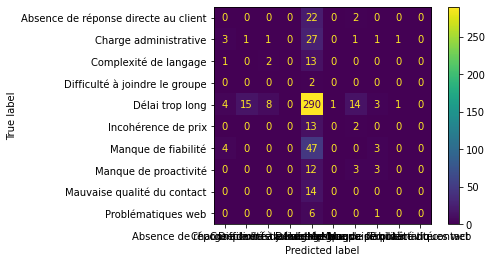

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 3.603 seconds...
							-----------------------------------------------------------



,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,Support Vector Classifier,0.646833,"[0.0, 0.0, 0.0, 0.0, 0.6473988439306358, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.05555555...","[0.0, 0.0, 0.0, 0.0, 0.7859649122807018, 0.0, ...","[[0, 0, 0, 0, 23, 0, 1, 0, 0, 0], [0, 0, 0, 0,..."
1,LogisitcRegression,0.644914,"[0.0, 0.0, 0.0, 0.0, 0.6467181467181468, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.9970238095238095, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.7845433255269322, 0.0, ...","[[0, 0, 0, 0, 23, 0, 1, 0, 0, 0], [0, 0, 0, 0,..."
2,KNeighborsClassifier,0.644914,"[0.0, 0.0, 0.0, 0.0, 0.6479690522243714, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.9970238095238095, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.7854630715123094, 0.0, ...","[[0, 0, 1, 0, 22, 0, 1, 0, 0, 0], [0, 0, 0, 0,..."
3,RandomForestClassifier,0.637236,"[0.0, 0.0, 0.0, 0.0, 0.64453125, 0.0, 0.0, 1.0...","[0.0, 0.0, 0.0, 0.0, 0.9821428571428571, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.7783018867924527, 0.0, ...","[[0, 0, 0, 0, 23, 0, 1, 0, 0, 0], [0, 0, 0, 0,..."
4,NaiveBayesClassifier,0.646833,"[0.0, 0.0, 0.0, 0.0, 0.6461538461538462, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.05555555...","[0.0, 0.0, 0.0, 0.0, 0.7850467289719627, 0.0, ...","[[0, 0, 0, 0, 24, 0, 0, 0, 0, 0], [0, 0, 0, 0,..."
5,DecisionTreeClassifier,0.568138,"[0.0, 0.0625, 0.18181818181818182, 0.0, 0.6502...","[0.0, 0.02857142857142857, 0.125, 0.0, 0.86309...","[0.0, 0.0392156862745098, 0.14814814814814814,...","[[0, 0, 0, 0, 22, 0, 2, 0, 0, 0], [3, 1, 1, 0,..."


In [54]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# check the performance on diffrent regressor
models = []
models.append(('Support Vector Classifier', svm.SVC()))
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('NaiveBayesClassifier', MultinomialNB()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)
    
    # evaluate model
    scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})

**Comments:**
Most of the models are returning same accuracy metrices